BLCA
# of ME: 5
# of Co: 20


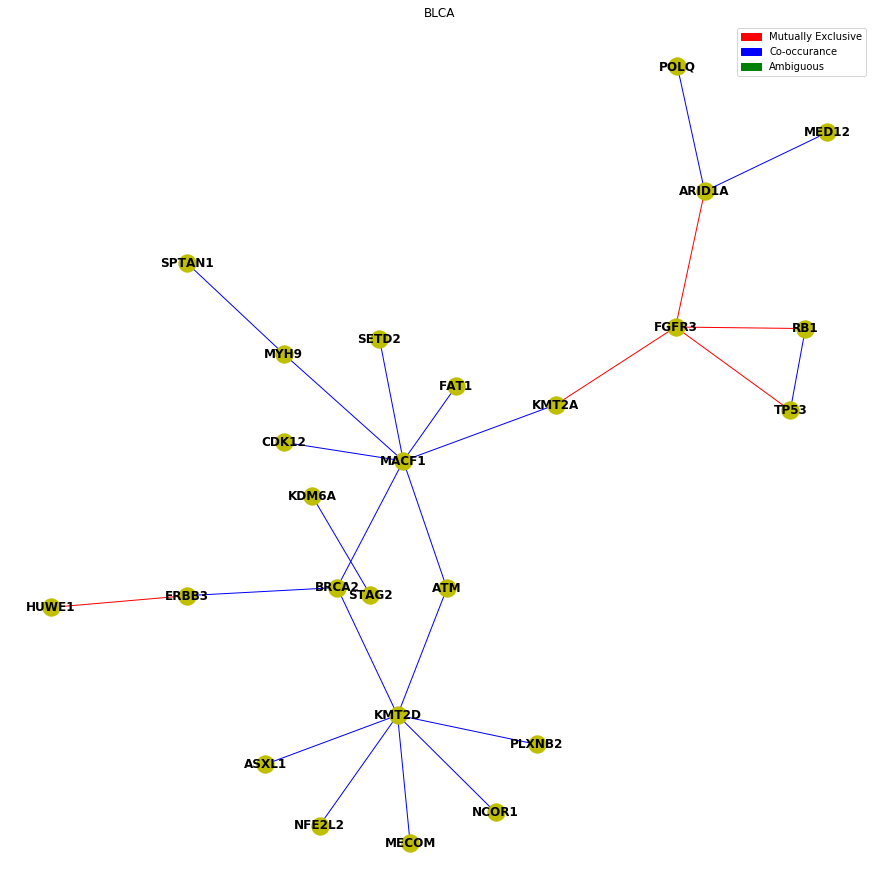

BRCA
# of ME: 20
# of Co: 19


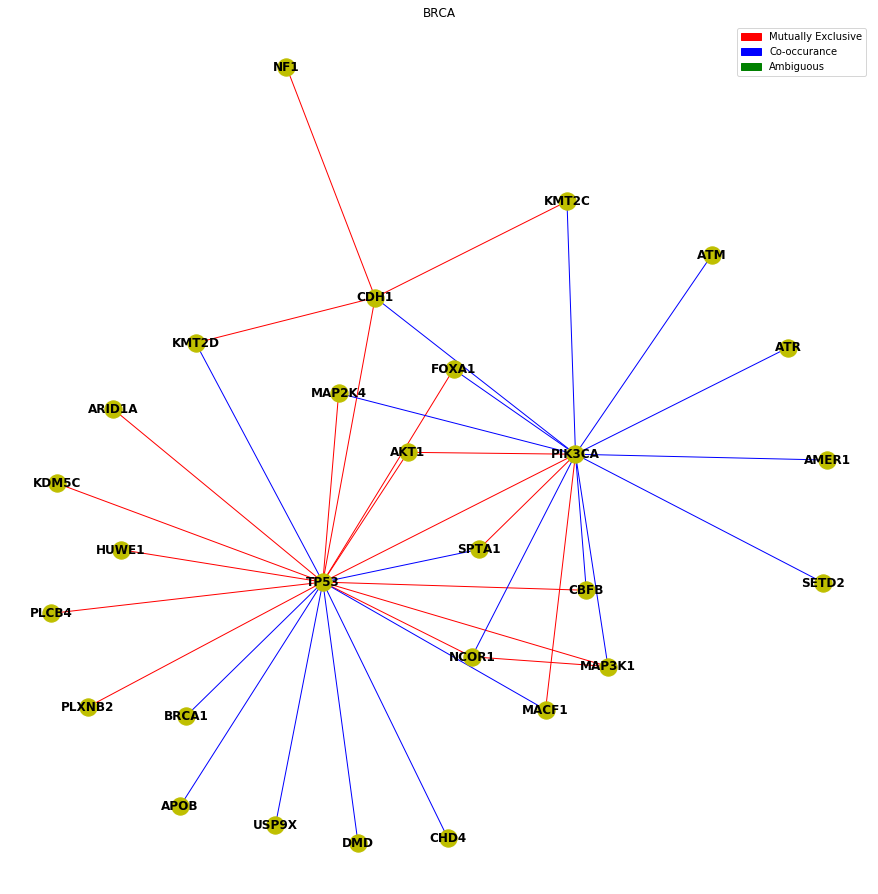

GBM
# of ME: 13
# of Co: 6


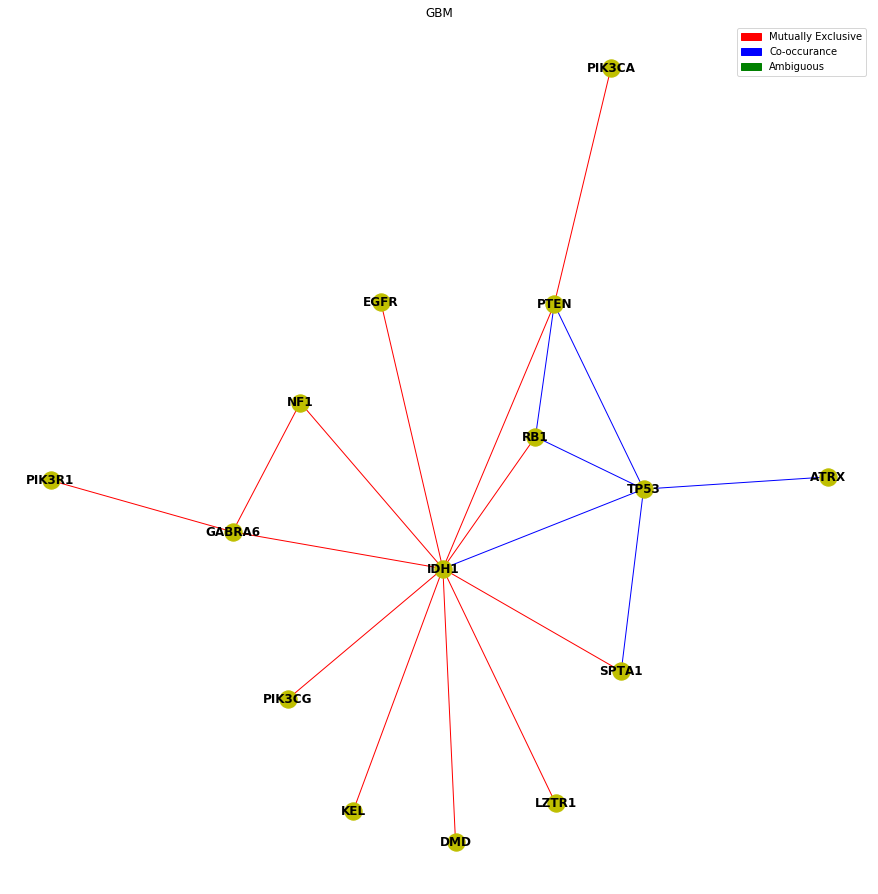

LGG
# of ME: 20
# of Co: 5


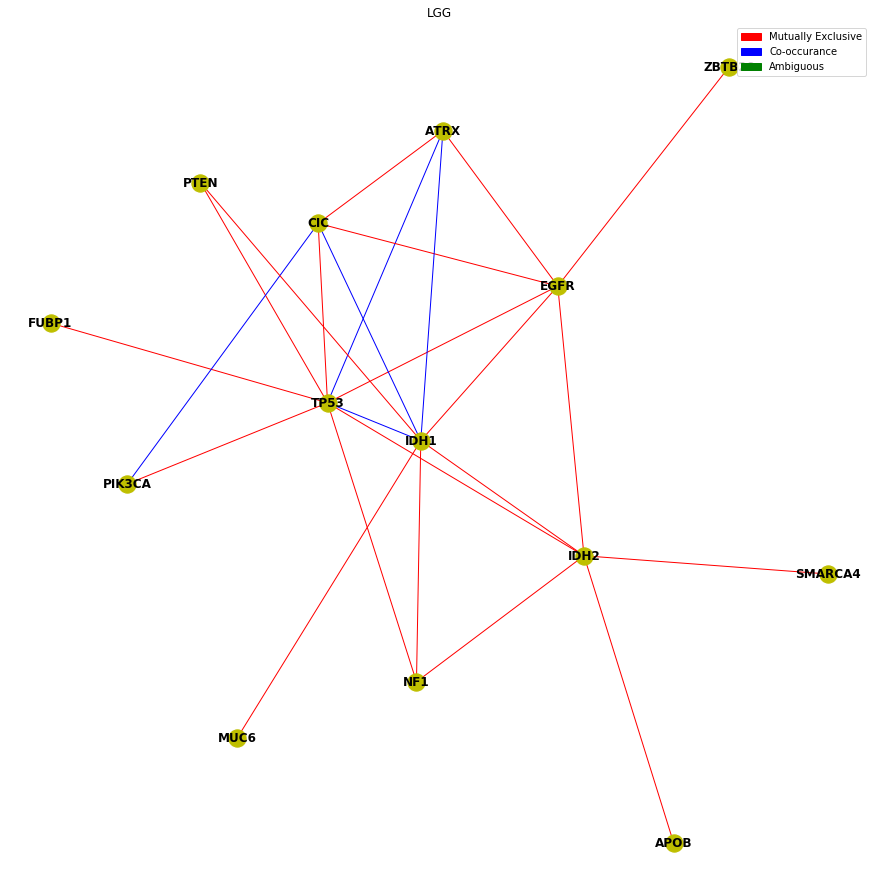

LIHC
# of ME: 0
# of Co: 0
KIRC
# of ME: 0
# of Co: 1


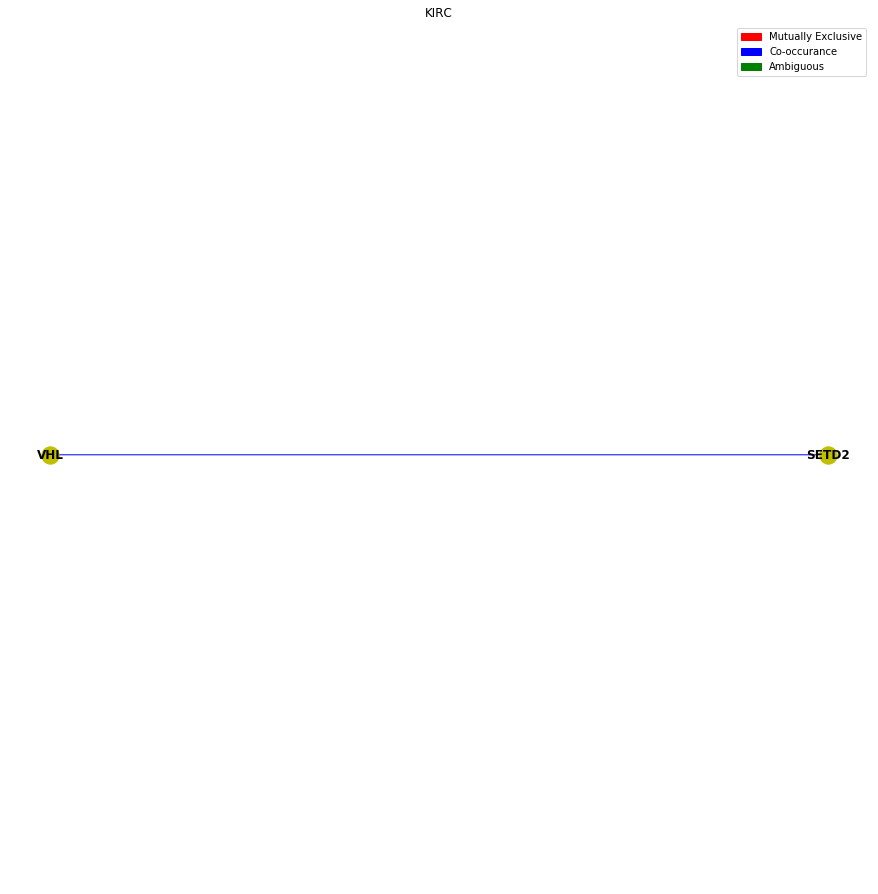

CESC
# of ME: 0
# of Co: 20


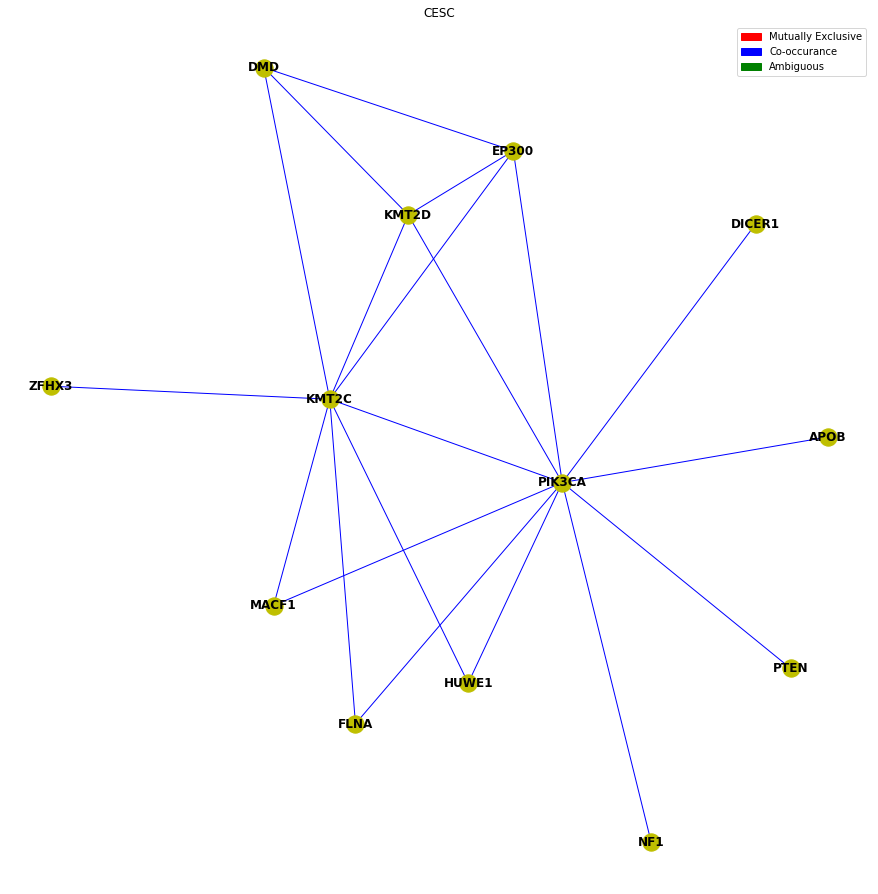

SKCM
# of ME: 10
# of Co: 20


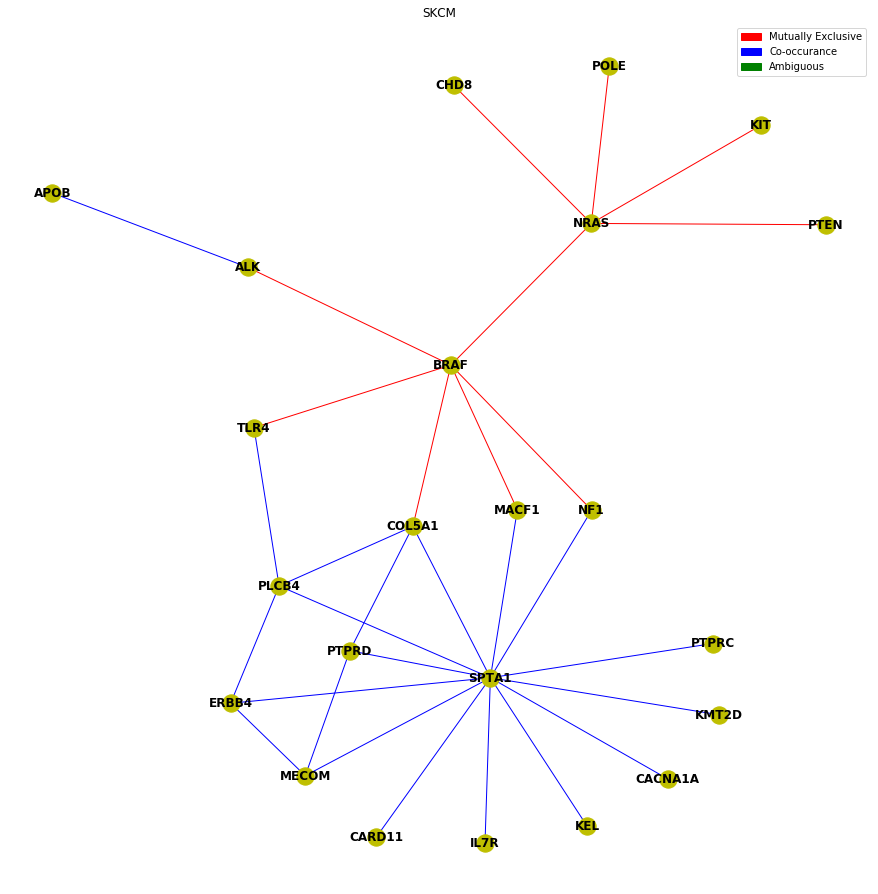

PAAD
# of ME: 0
# of Co: 1


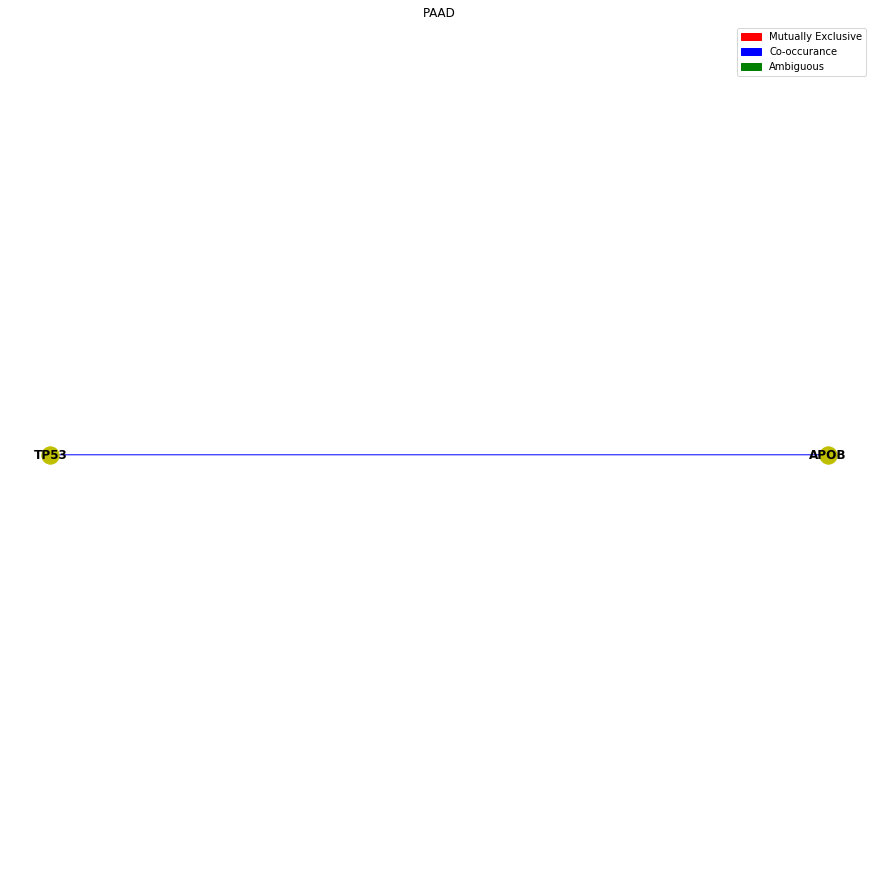

LUSC
# of ME: 0
# of Co: 1


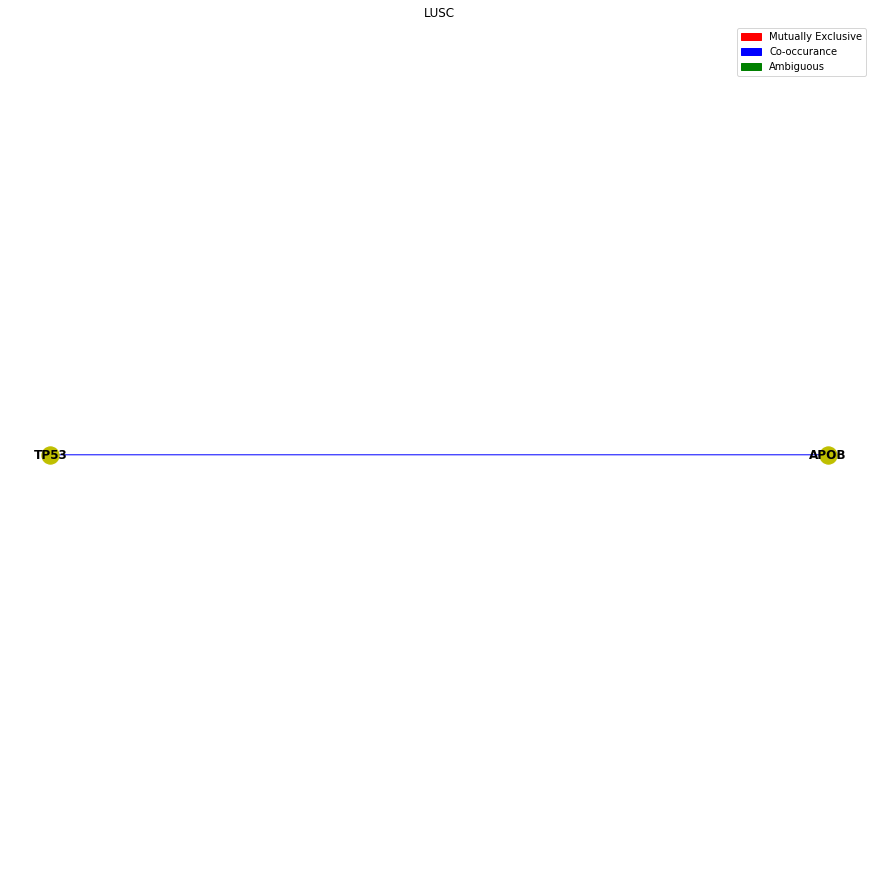

LUAD
# of ME: 7
# of Co: 5


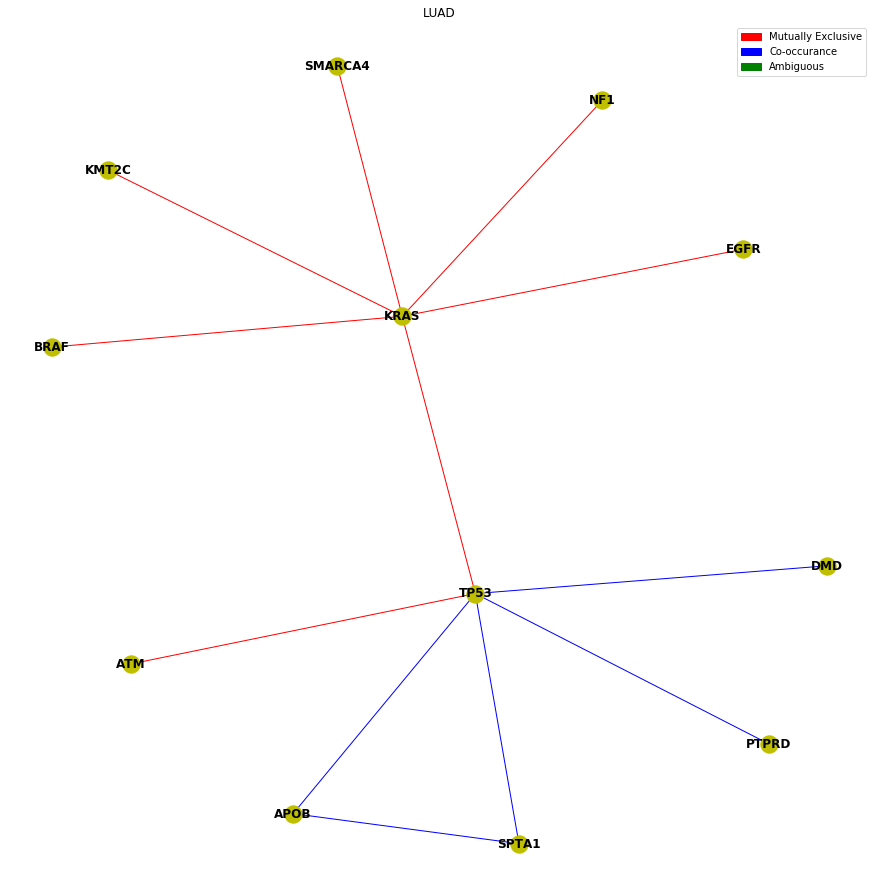

UCEC
# of ME: 20
# of Co: 20


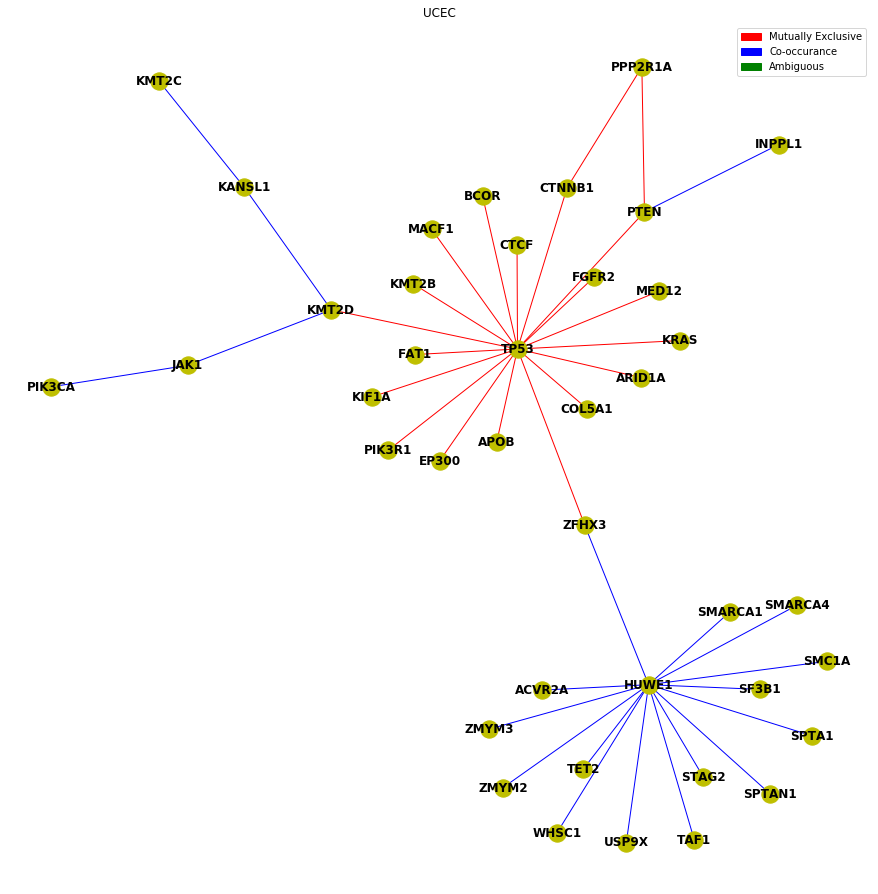

In [111]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure

# cancerList = ["BRCA", "GBM", "LAML", "LGG", "LIHC", "KIRP", "KIRC", \
#               "CESC", "STAD", "SKCM", "SARC", "PAAD", "LUSC", "LUAD", \
#               "UCEC"]

cancerList = ["BLCA","BRCA", "GBM", "LGG", "LIHC", "KIRC", \
              "CESC", "SKCM", "PAAD", "LUSC", "LUAD", \
              "UCEC"]
# cancerList = ["BLCA"]

for myCancer in cancerList:
    G = nx.Graph()
    print(myCancer)
    ####### Mutually Exclusive Red Edges
    ME_count = 0
    file_n = myCancer + '/' + myCancer + "_mut.csv"
    with open(file_n, newline='') as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            G.add_edge(row[1], row[2], color='r')
            ME_count += 1
            if ME_count >= 20: break

    print("# of ME: "+str(len(G.edges)))

    ####### Co-occurance Blue Edges
    Co_count = 0
    file_n = myCancer + '/' + "bigSummaryDf_" + myCancer + ".csv"
    if myCancer == 'BLCA':
        file_n = "BLCA/bigSummaryDfw_cutoff_BLCA.csv"
    data = pd.read_csv(file_n)
    data.sort_values("pval", inplace=True)
    for idx, row in data.iterrows():
        if row["co_occurance"] >= row["co_cut"]:
            Co_count += 1
            n1 = row['gene1']
            n2 = row['gene2']
            if G.has_edge(n1, n2):
                ### If Co-occurance and Exclusive duplicate
                G.add_edge(n1, n2, color='g')
                print('AAAAAAAAAAAAAAAAAA')
            else:
                G.add_edge(n1, n2, color='b')
        if Co_count >= 20: break
    print("# of Co: "+str(len(G.edges)-ME_count))

    ####### Checking if there is no significant gene-pair
    edges = G.edges()
    if len(edges) == 0:
        continue
    
    pos = nx.circular_layout(G)
    pos = nx.kamada_kawai_layout(G)

    ####### Plotting
    colors = [G[u][v]['color'] for u,v in edges]
    plt.figure(figsize=(12,12))
    nx.draw(G, pos, node_color='y', with_labels=True, font_weight='bold', \
            edges=edges, edge_color=colors)
    plt.title(myCancer)
    red = mpatches.Patch(color='red', label='Mutually Exclusive')
    blue = mpatches.Patch(color='blue', label='Co-occurance')
    green = mpatches.Patch(color='green', label='Ambiguous')
    plt.legend(handles=[red, blue, green])
    plt.savefig(myCancer+'/'+myCancer+'_net.png', bbox_inches="tight")
    plt.show()

FAT1 MACF1 16 8.0
ARID1A POLQ 12 6.0
MACF1 SETD2 12 7.0
KMT2A MACF1 21 10.0
ASXL1 KMT2D 11 6.0
ATM KMT2D 22 14.0
ATM MACF1 19 12.0
RB1 TP53 37 25.0
KDM6A STAG2 16 10.0
BRCA2 KMT2D 16 9.0
BRCA2 MACF1 15 8.0
CDK12 MACF1 14 6.0
MYH9 SPTAN1 11 5.0
KMT2D NFE2L2 13 8.0
KMT2D MECOM 13 5.20000000000005
BRCA2 ERBB3 11 5.0
ARID1A MED12 11 6.0
KMT2D NCOR1 15 9.0
KMT2D PLXNB2 11 6.0
MACF1 MYH9 14 8.0
KMT2A NCOR1 11 5.0
KMT2D POLQ 13 7.0
KMT2C KMT2D 25 17.0
ERBB3 FAT1 13 6.0
EP300 MYH9 11 6.0
ATM KMT2C 17 10.0
MACF1 NCOR1 13 7.0
ERBB2 KMT2A 13 7.0
CUL1 KMT2D 11 6.0
FGFR3 SPTAN1 14 8.0
CDKN2A TP53 14 9.0
ERBB2 RB1 13 8.0
ERBB3 MACF1 17 11.0
KMT2C POLQ 11 5.0
PIK3CA SPTAN1 16 10.2
ARHGAP35 TP53 15 11.0
ARID1A MACF1 23 16.0
CREBBP RB1 12 8.0
KMT2D MACF1 27 19.0
KMT2A KMT2D 17 12.0
ARID1A ERBB2 17 11.0
KMT2C MACF1 20 14.0
ARID1A NCOR1 12 8.0
ASXL2 MACF1 12 8.0
MACF1 TP53 42 35.0
ERCC2 KDM6A 15 9.0
FAT1 PIK3CA 14 9.0
FGFR3 STAG2 12 8.0
ARID1A ATM 16 12.0
CHD4 MACF1 11 7.0
ARID1A BRCA2 12 8.0
ARID1A NF1 